In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import math

In [2]:
sns.set_theme()

## 1. File processing functionalities

In [3]:
# Metrics
def index_difficulty(d, w):
  return math.log2((2*d) / w)

def index_performance(id, mt):
  return id / mt

def get_id_col(df):
  return df.apply(lambda row: index_difficulty(row['A'], row['w']), axis=1)
# ============================================================================

# File reading / analysis
def get_name_device_mode(filename):
  name, a, b = filename.lower().split("/")[-1].split('_')[:3]

  # some file were named "name_device_mode" and some "name_mode_device"
  if a in ["tablet", "mouse"]:
    device = a
    mode = b
  else:
    device = b
    mode = a
  return name.capitalize(), device.capitalize(), mode.capitalize()

def analyse_file(filename):
  df = pd.read_csv(filename, skiprows=2)
  avg_click = df['clickTime'].mean()
  total_time = df['clickTime'].sum()
  errors = df['currentNumberOfErrors'].array[-1]
  name, device, mode = get_name_device_mode(filename)

  # give info for combined df
  df["device"] = device
  df["mode"] = mode

  return df, [name, device, mode, avg_click, total_time, errors]
# ============================================================================

In [4]:
# reading all csv files in "folder_name" make a table with total time / avg_click / errors
# also make combined df which contains every click data of all csv files
folder_name = 'data/'

table = []
combined_df = pd.DataFrame()
for filename in glob.glob(f'{folder_name}*.csv'):
  df, row = analyse_file(filename)
  table.append(row)
  combined_df = pd.concat([combined_df, df])

# add id metric
combined_df["ID"] = get_id_col(combined_df)

# make df from table
df = pd.DataFrame(table, columns=["Name", "Device", "Mode", "AvgTime", "Total Time", "Errors"])

In [5]:
df.sort_values(by=["Name", "Device", "Mode"])

,Name,Device,Mode,AvgTime,Total Time,Errors
5,Alex,Mouse,Bubble,1.125529,272.378,3
44,Alex,Mouse,Normal,1.168946,282.885,12
4,Alex,Tablet,Bubble,1.153112,279.053,35
45,Alex,Tablet,Normal,1.246343,301.615,45
27,Ana,Mouse,Bubble,1.429256,345.880,1
38,Ana,Mouse,Normal,1.238508,299.719,8
36,Ana,Tablet,Bubble,1.350161,326.739,6
18,Ana,Tablet,Normal,1.516591,367.015,33
6,Gabriel,Mouse,Bubble,1.094678,264.912,3
41,Gabriel,Mouse,Normal,1.226008,296.694,9


## 2. Initial analysis

In [6]:
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean().T
extended_x = np.linspace(*x_axis, 100)

def plot_id_mt(device=["Mouse", "Tablet"], mode=["Normal", "Bubble"], legend_size=None):
  for d in device:
    for m in mode:
      x = tmp[d][m].T.index.to_numpy()
      y = tmp[d][m].T["clickTime"].to_numpy()
      plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
      p = np.polyfit(x, y, 1)
      plt.plot(extended_x, np.polyval(p, extended_x), label=f"y = {p[0]:.2f}x + {p[1]:.2f}")

  if legend_size:
    plt.legend(prop={"size": legend_size})
  else:
    plt.legend()
  plt.axis(x_axis + y_axis)
  plt.xlabel("Index of Difficulty (ID)")
  plt.ylabel("Movement Time (seconds)")
  plt.show()

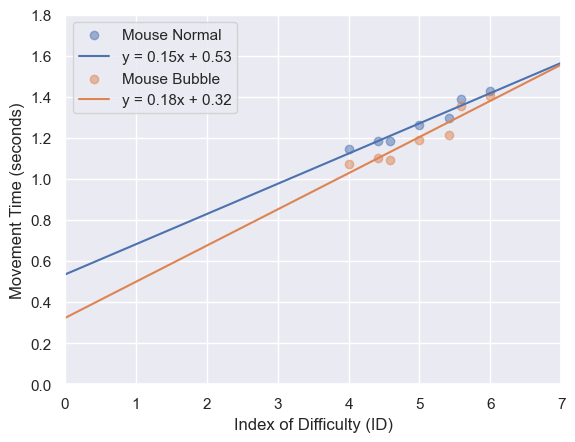

In [7]:
plot_id_mt(device=["Mouse"])

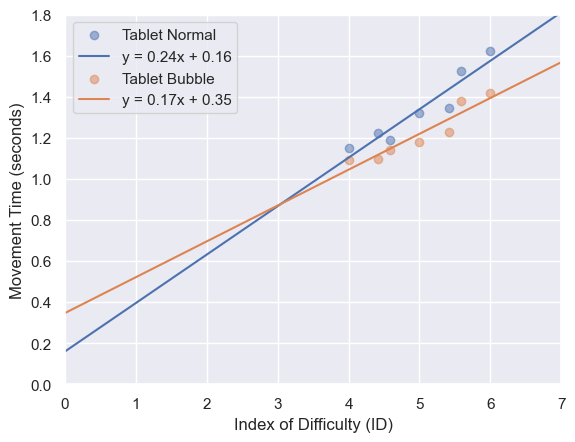

In [8]:
plot_id_mt(device=["Tablet"])

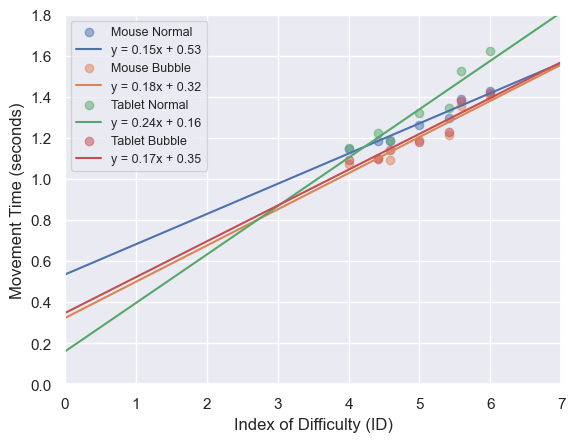

In [9]:
plot_id_mt(legend_size=9)

In [10]:
df["Input method"] = df["Device"] + " " + df["Mode"]

In [11]:
# stats for groups
df.groupby(["Input method"]).describe()

AvgTime                                                    \
                count      mean       std       min       25%       50%   
Input method                                                              
Mouse Bubble     12.0  1.199528  0.121682  1.087525  1.121294  1.141723   
Mouse Normal     12.0  1.268181  0.065302  1.168946  1.235383  1.250583   
Tablet Bubble    12.0  1.209502  0.148928  0.955058  1.109839  1.217430   
Tablet Normal    12.0  1.334138  0.186608  1.099004  1.209405  1.285326   

                                  Total Time              ...             \
                    75%       max      count        mean  ...        75%   
Input method                                              ...              
Mouse Bubble   1.253261  1.429256       12.0  290.285833  ...  303.28925   
Mouse Normal   1.296119  1.399178       12.0  306.899917  ...  313.66075   
Tablet Bubble  1.314477  1.477145       12.0  292.699583  ...  318.10350   
Tablet Normal  1.404302  1.720872       12.0  322.861500  ...  339.84100   

                       Errors                                                  \
                   max  count       mean        std   min    25%   50%    75%   
Input method                                                                    
Mouse Bubble   345.880   12.0   8.666667  12.055428   1.0   2.75   4.5   9.50   
Mouse Normal   338.601   12.0  25.500000  18.918485   2.0   9.00  20.0  47.25   
Tablet Bubble  357.469   12.0  33.166667  28.238701   6.0  16.25  27.0  38.00   
Tablet Normal  416.451   12.0  69.583333  50.078953  21.0  44.50  50.5  74.50   

                      
                 max  
Input method          
Mouse Bubble    45.0  
Mouse Normal    53.0  
Tablet Bubble  113.0  
Tablet Normal  203.0  

[4 rows x 24 columns]

<AxesSubplot: xlabel='Input method', ylabel='Errors'>

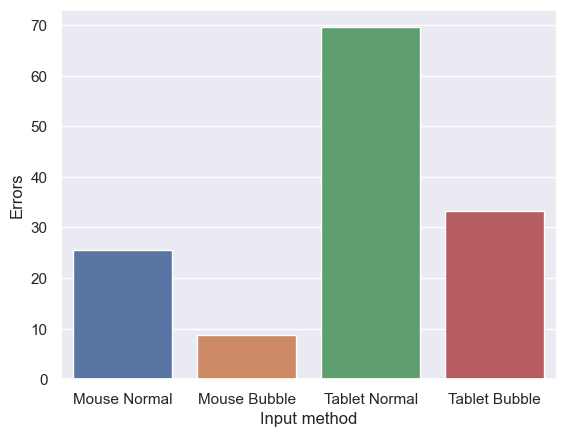

In [12]:
# plotting test
order = ["Mouse Normal", "Mouse Bubble", "Tablet Normal", "Tablet Bubble"]
sns.barplot(data=df, x="Input method", y="Errors", errorbar=None, order=order)

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/1289652520.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))


<AxesSubplot: xlabel='Input method', ylabel='Total Time'>

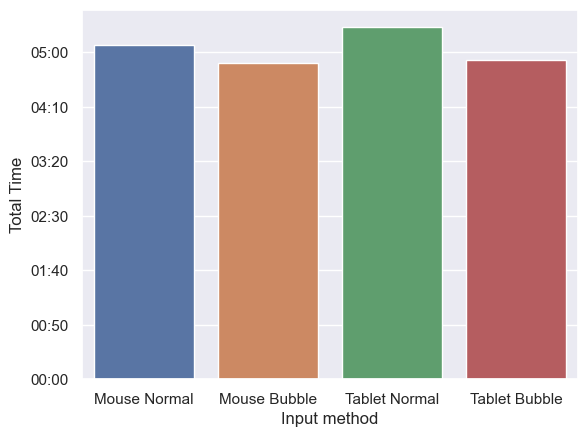

In [13]:
# df.groupby(["Device", "Mode"])[["Total Time"]].mean().T.plot.bar()
ax = sns.barplot(data=df, x="Input method", y="Total Time", errorbar=None, order=order)

# time format for y axis
ticks = ax.get_yticks()
ax.set_yticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))

ax

## 3. Time series over the four combinations

For each of the four combinations, (MN, MB, TN, TB) we will take the average results from the participants and plot them as the test progresses

In [14]:
import os 


file_names_MN = list(filter( lambda x: "mouse" in x and "normal" in x, os.listdir("./data")))
file_names_MB = list(filter( lambda x: "mouse" in x and "bubble" in x, os.listdir("./data")))
file_names_TN = list(filter( lambda x: "tablet" in x and "normal" in x, os.listdir("./data")))
file_names_TB = list(filter( lambda x: "tablet" in x and "bubble" in x, os.listdir("./data")))


In [15]:
# make a dataframe with all times for an experiment

def analysis_one_metric(column_name: str, number_of_files: int):

    df_MN = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_MN[0]), skiprows=2)[column_name]) 
    df_MB = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_MB[0]), skiprows=2)[column_name])
    df_TN = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_TN[0]), skiprows=2)[column_name])
    df_TB = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_TB[0]), skiprows=2)[column_name])

    df_MN.rename(columns={column_name: column_name + "0"}, inplace= True) 
    df_MB.rename(columns={column_name: column_name + "0"}, inplace= True) 
    df_TN.rename(columns={column_name: column_name + "0"}, inplace= True) 
    df_TB.rename(columns={column_name: column_name + "0"}, inplace= True) 

    for i in range(1,number_of_files):
        # d= pd.DataFrame(pd.read_csv(os.path.join("data", file_names[0]), skiprows=2)["clickTime"])
        # d.rename(columns={"clickTime": "clickTime{0}".format(i)}, inplace= True)
        df_MN[column_name + "{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_MN[i]), skiprows=2)[column_name] 
        df_MB[column_name + "{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_MB[i]), skiprows=2)[column_name] 
        df_TN[column_name + "{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_TN[i]), skiprows=2)[column_name] 
        df_TB[column_name + "{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_TB[i]), skiprows=2)[column_name] 

    return df_MN, df_MB, df_TN, df_TB


/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/4144026022.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))
/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/4144026022.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))
/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/4144026022.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))
/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/4144026022.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))


Text(0.5, 1.0, 'Tablet Bubble')

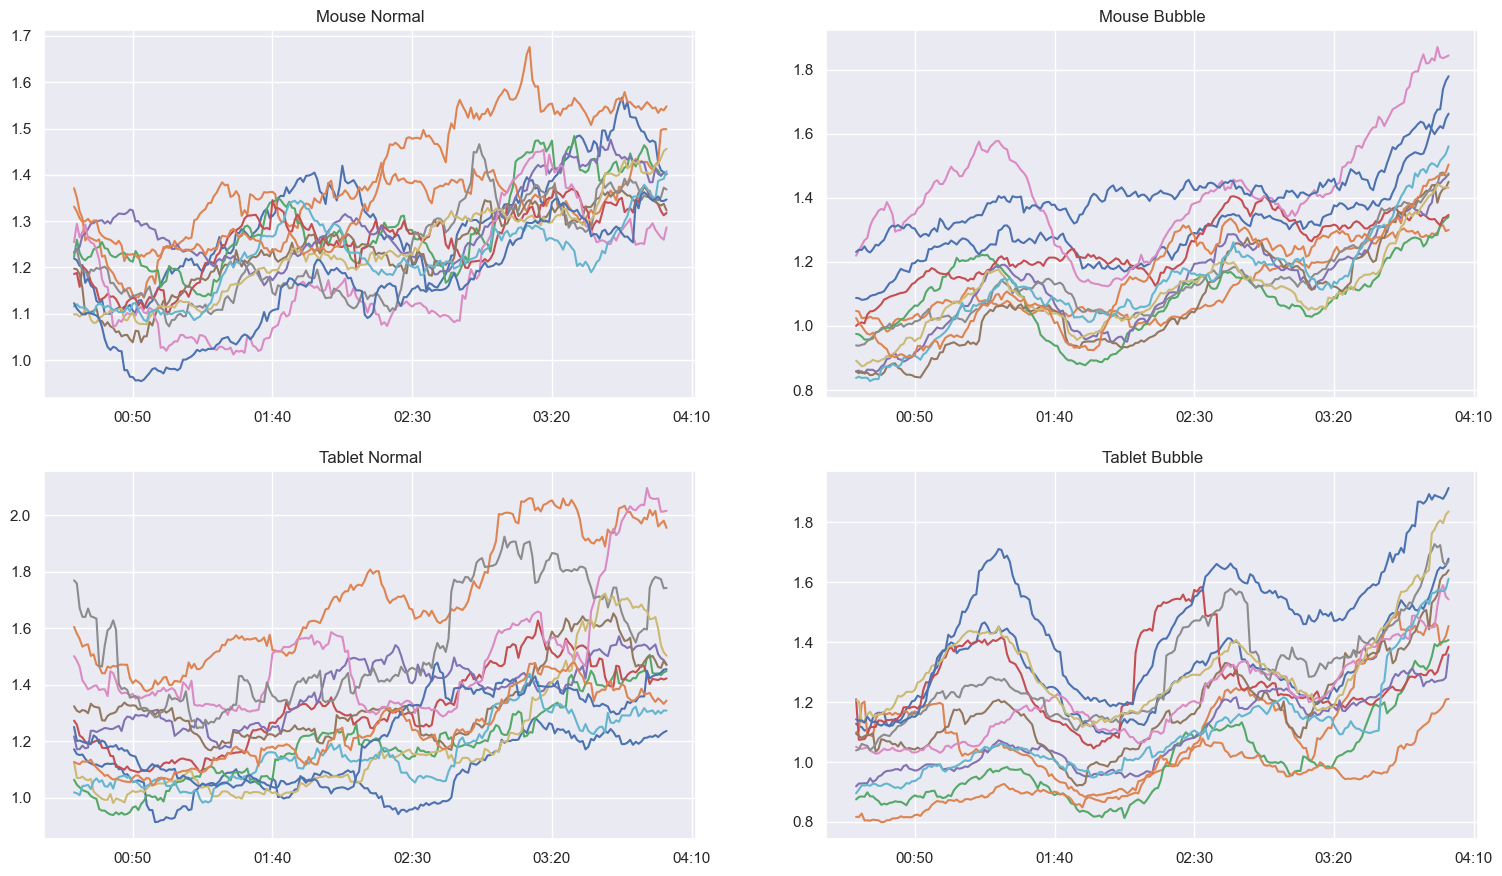

In [16]:
# Q: What happens when I print all the times of the pariticipants?
# A: A mess lol

df_times_MN, df_times_MB, df_times_TN, df_times_TB = analysis_one_metric("clickTime", len(file_names_MN))


fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for i in range(len(file_names_MB)):
    ax[0][0].plot(df_times_MN["clickTime{0}".format(i)].rolling(30).mean()) 
    ax[0][1].plot(df_times_MB["clickTime{0}".format(i)].rolling(30).mean())
    ax[1][0].plot(df_times_TN["clickTime{0}".format(i)].rolling(30).mean())
    ax[1][1].plot(df_times_TB["clickTime{0}".format(i)].rolling(30).mean())

for i in range(2):
    for j in range(2):
        ticks = ax[i][j].get_xticks()
        ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))

ax[0][0].set_title("Mouse Normal")
ax[0][1].set_title("Mouse Bubble")
ax[1][0].set_title("Tablet Normal")
ax[1][1].set_title("Tablet Bubble")





So plotting the data with a rolling mean highlights only the trends of the data. 
1. The normal versions do get progressively slower, as by the end the test becomes more difficult (smaller and more crowded targets)
2. The bubble versions, for both devices, have a peak in click time, then the clicktime becomes slower as the targets get more crowded   

In [17]:
# Get the mean time for experiment for all participants 

df_times_MN["meanClickTime"] = df_times_MN.mean(axis=1)
df_times_MB["meanClickTime"] = df_times_MB.mean(axis=1)
df_times_TN["meanClickTime"] = df_times_TN.mean(axis=1)
df_times_TB["meanClickTime"] = df_times_TB.mean(axis=1)

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/3967663222.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))


Text(0.5, 1.0, 'The mean click times for the four combinations')

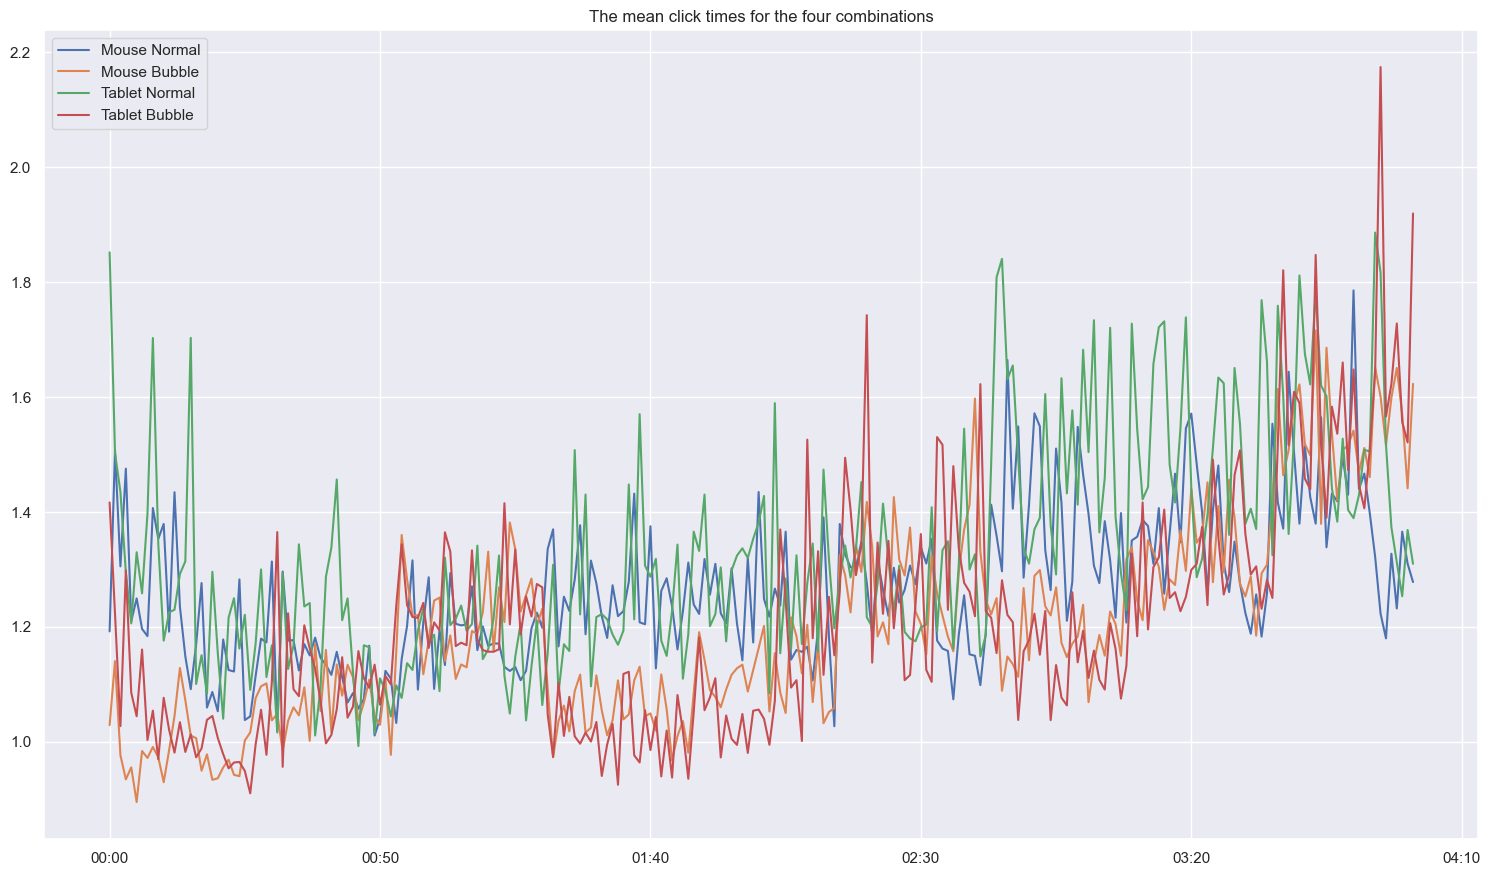

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(df_times_MN["meanClickTime"], label="Mouse Normal")
ax.plot(df_times_MB["meanClickTime"], label="Mouse Bubble")
ax.plot(df_times_TN["meanClickTime"], label="Tablet Normal")
ax.plot(df_times_TB["meanClickTime"], label="Tablet Bubble")


ticks = ax.get_xticks()
ax.set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))


ax.legend()
ax.set_title("The mean click times for the four combinations")

Text(0.5, 1.0, 'The mean click times for the four combinations')

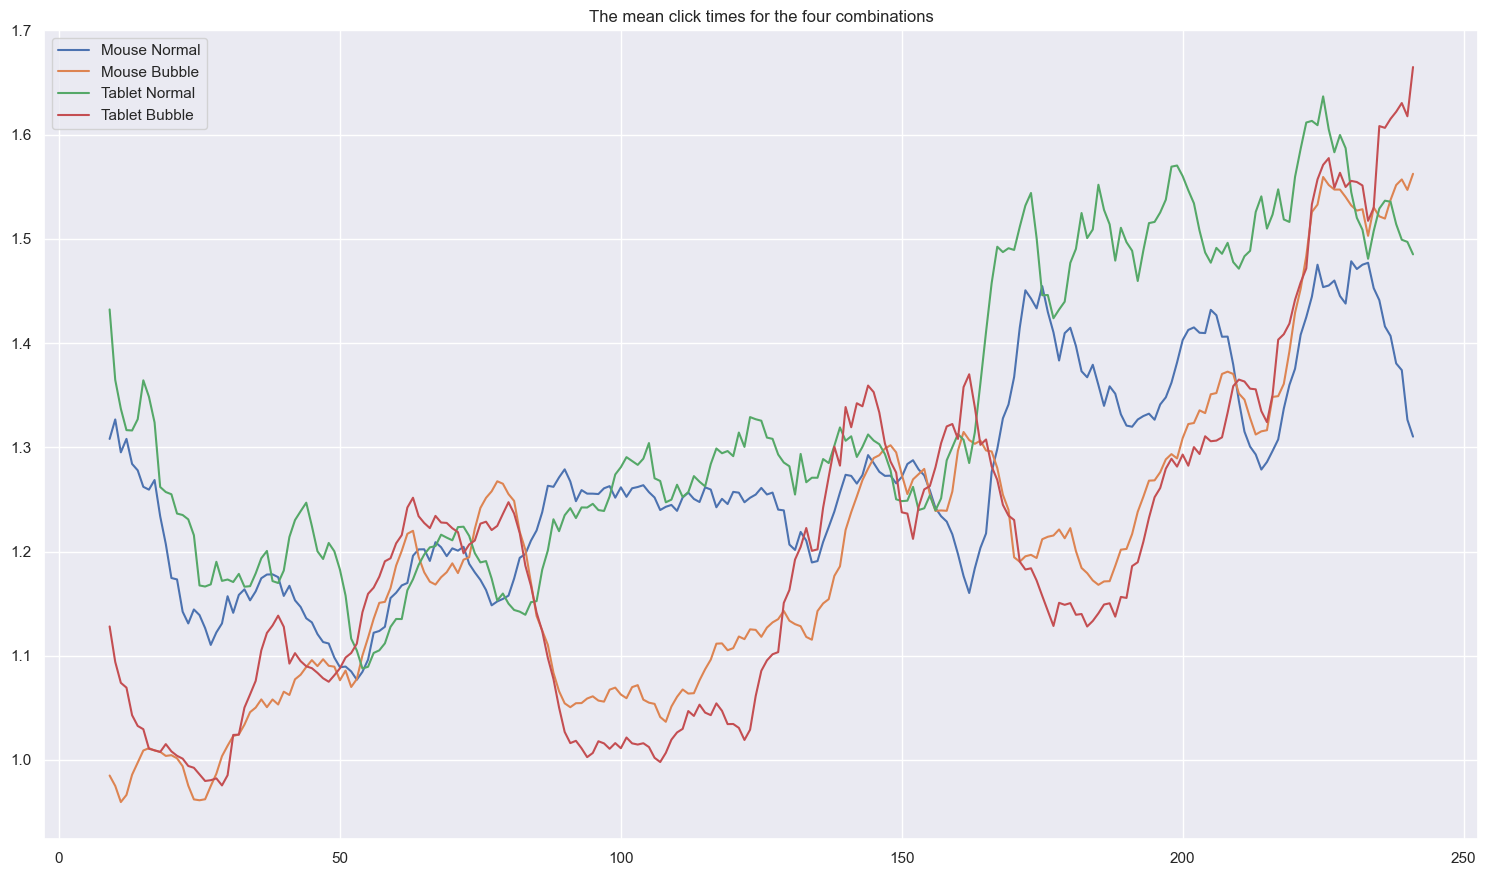

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(df_times_MN["meanClickTime"].rolling(10).mean(), label="Mouse Normal")
ax.plot(df_times_MB["meanClickTime"].rolling(10).mean(), label="Mouse Bubble")
ax.plot(df_times_TN["meanClickTime"].rolling(10).mean(), label="Tablet Normal")
ax.plot(df_times_TB["meanClickTime"].rolling(10).mean(), label="Tablet Bubble")

ticks = ax.get_xticks()
# ax.set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))

ax.legend()
ax.set_title("The mean click times for the four combinations")

## 4. Same plots, but with the cumulative errors

In [20]:
df_errs_MN, df_errs_MB, df_errs_TN, df_errs_TB = analysis_one_metric("currentNumberOfErrors", len(file_names_MN));

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/2238324058.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))
/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/2238324058.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))
/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/2238324058.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))
/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/2238324058.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))


Text(0.5, 1.0, 'Tablet Bubble')

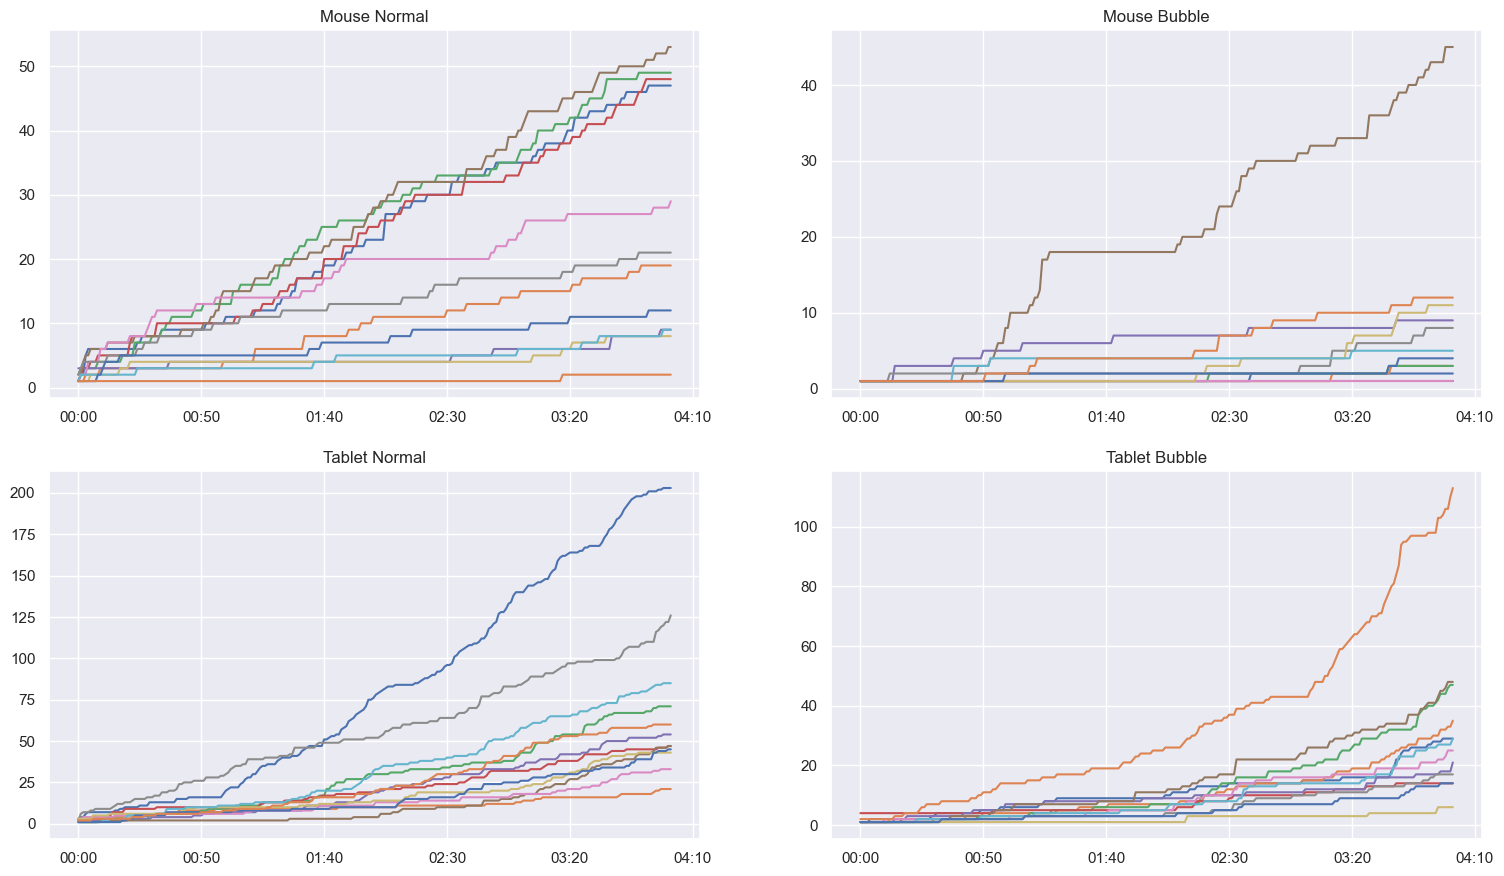

In [21]:

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for i in range(len(file_names_MB)):
    ax[0][0].plot(df_errs_MN["currentNumberOfErrors{0}".format(i)]) 
    ax[0][1].plot(df_errs_MB["currentNumberOfErrors{0}".format(i)])
    ax[1][0].plot(df_errs_TN["currentNumberOfErrors{0}".format(i)])
    ax[1][1].plot(df_errs_TB["currentNumberOfErrors{0}".format(i)])

for i in range(2):
    for j in range(2):
        ticks = ax[i][j].get_xticks()
        ax[i][j].set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))

ax[0][0].set_title("Mouse Normal")
ax[0][1].set_title("Mouse Bubble")
ax[1][0].set_title("Tablet Normal")
ax[1][1].set_title("Tablet Bubble")

In [22]:
df_times_MN["meanCumErr"] = df_errs_MN.mean(axis=1)
df_times_MB["meanCumErr"] = df_errs_MB.mean(axis=1)
df_times_TN["meanCumErr"] = df_errs_TN.mean(axis=1)
df_times_TB["meanCumErr"] = df_errs_TB.mean(axis=1)

/var/folders/jb/4gpmdvz93yd0j5vr_59ggqqm0000gn/T/ipykernel_4529/1052993425.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))


Text(0.5, 1.0, 'The mean click times for the four combinations')

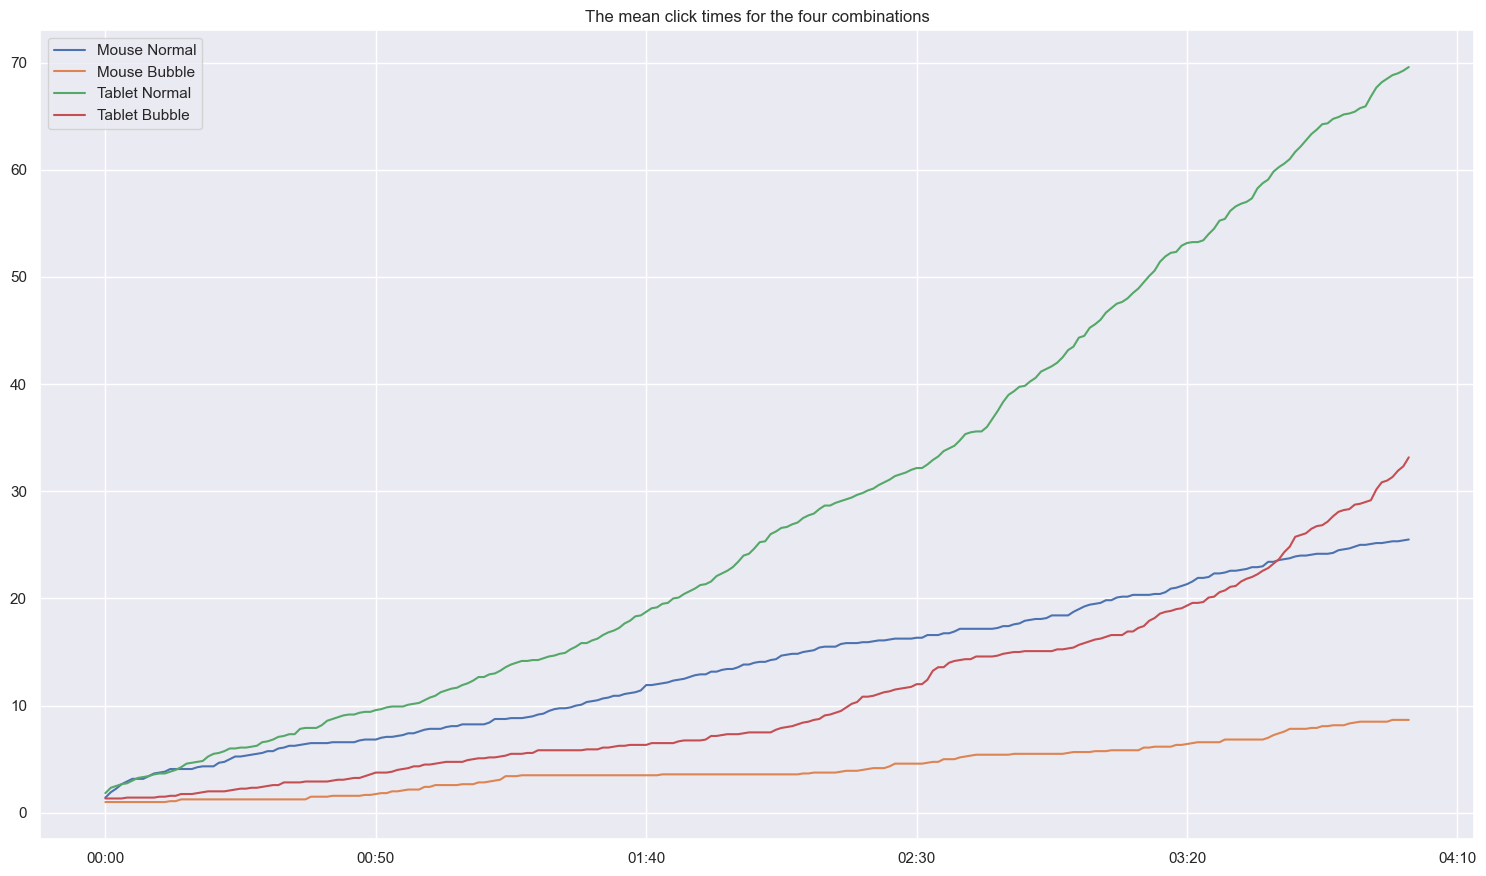

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(df_times_MN["meanCumErr"], label="Mouse Normal")
ax.plot(df_times_MB["meanCumErr"], label="Mouse Bubble")
ax.plot(df_times_TN["meanCumErr"], label="Tablet Normal")
ax.plot(df_times_TB["meanCumErr"], label="Tablet Bubble")

ticks = ax.get_xticks()
ax.set_xticklabels(pd.to_datetime(ticks, unit='s').strftime('%M:%S'))

ax.legend()
ax.set_title("The mean click times for the four combinations")



## 5. Statistical significance

### 5.1 Time on all clicks 

We want to compare the four combos: MN, MB, TN, TB using significance tests. We want to see the differences between the different treatments and how they compare. 

In [24]:
#get the distributions that we want to compare, let's get the time distributions first 

def get_all_values_of_all(file_names, column_name):

    result = np.array([])
    for f in file_names:
        result = np.append(result, pd.read_csv(os.path.join("data", f), skiprows=2)[column_name].to_numpy())

    return result


MNt = get_all_values_of_all(file_names_MN, "clickTime")
MBt = get_all_values_of_all(file_names_MB, "clickTime")
TNt = get_all_values_of_all(file_names_TN, "clickTime")
TBt = get_all_values_of_all(file_names_TB, "clickTime")


In [25]:
# run statistical significance tests

from scipy import stats 

print("P-value for KS test between mouse normal, mouse bubble: {0}".format(stats.ks_2samp(MNt, MBt).pvalue))
print("P-value for KS test between mouse bubble, tablet bubble: {0}".format(stats.ks_2samp(MBt, TBt).pvalue))
print("P-value for KS test between mouse normal, tablet normal: {0}".format(stats.ks_2samp(MNt, TNt).pvalue))
print("P-value for KS test between tablet normal, tablet bubble: {0}".format(stats.ks_2samp(TNt, TBt).pvalue))





P-value for KS test between mouse normal, mouse bubble: 2.1277957916246225e-21
P-value for KS test between mouse bubble, tablet bubble: 0.010919284479766173
P-value for KS test between mouse normal, tablet normal: 3.875332923972068e-08
P-value for KS test between tablet normal, tablet bubble: 6.828666370119194e-19


Let us look at the p-values when comparing the distributions. 
    
For all distributions, p is less than 0.05, which means that the pairs of distributions are 95% sure to be different. 
How ever (now this might be far fetched, but I will just mention), we can pe 99% sure of the statistical significance only on the first and last comparisons. 



A hyphothesis of mine was that while the bubble cursor improves the target acquisition for both the tablet and the mouse, the difference between mouse bubble and tablet bubble would not be that large. An idea to prove this was to use the KS test and see is the distributions are similar enough (failure t reject the null hyphotesis). While this was not supported by the data with 95% confidence, it could be supported if we require 99% confidence. 

In [26]:
print("P-value for ANOVA test between mouse normal, mouse bubble: {0}".format(stats.f_oneway(MNt, MBt).pvalue))
print("P-value for ANOVA test between mouse bubble, tablet bubble: {0}".format(stats.f_oneway(MBt, TBt).pvalue))
print("P-value for ANOVA test between mouse normal, tablet normal: {0}".format(stats.f_oneway(MNt, TNt).pvalue))
print("P-value for ANOVA test between tablet normal, tablet bubble: {0}".format(stats.f_oneway(TNt, TBt).pvalue))

P-value for ANOVA test between mouse normal, mouse bubble: 2.4557976403680875e-16
P-value for ANOVA test between mouse bubble, tablet bubble: 0.30996839240554624
P-value for ANOVA test between mouse normal, tablet normal: 2.339355584706819e-09
P-value for ANOVA test between tablet normal, tablet bubble: 2.2680294136217026e-24


The results of the ANOVA test are consistent with the results of the KS test (ish). It looks, from this guy, that the only group that is similar is mouse bubble and tablet bubble. 

### 5.2 Average time per person

In [27]:
def get_averaged_values(file_names, column_name):
    
    result = [] 

    for f in file_names:
        result.append(np.mean(pd.read_csv(os.path.join("data", f), skiprows=2)[column_name].array ))
        # print(pd.read_csv(os.path.join("data", f)))

    return np.array(result)



MNt_avg = get_averaged_values(file_names_MN, "clickTime") 
MBt_avg = get_averaged_values(file_names_MB, "clickTime")
TNt_avg = get_averaged_values(file_names_TN, "clickTime")
TBt_avg = get_averaged_values(file_names_TB, "clickTime")


In [28]:
print(TNt_avg)
print(TBt_avg)


[1.09900413 1.7208719  1.19871901 1.32430992 1.3668719  1.34772727
 1.51659091 1.58321901 1.21296694 1.15840496 1.24634297 1.23463223]
[1.31443388 1.15311157 1.01967769 1.28145455 1.10060331 1.21228512
 1.22257438 1.31460744 1.35016116 1.11291735 1.47714463 0.95505785]


In [29]:
# KS test on the averages 

print("P-value for KS test between the averages of mouse normal, mouse bubble: {0}".format(stats.ks_2samp(MNt_avg, MBt_avg).pvalue))
print("P-value for KS test between the averages of mouse bubble, tablet bubble: {0}".format(stats.ks_2samp(MBt_avg, TBt_avg).pvalue))

# TODO: Why are those two values below equal ??? -- Mattis
# ANS: I have no clue (it looked weird for me too) My nugget of wisdom is that, since there are very few values, sooomehow the computations 
# gave the same values. Also, the KS test might be the wrong way to go, since it wants continuous distributions -- Ioana

 
print("P-value for KS test between the averages of mouse normal, tablet normal: {0}".format(stats.ks_2samp(MNt_avg, TNt_avg).pvalue))
print("P-value for KS test between the averages of tablet normal, tablet bubble: {0}".format(stats.ks_2samp(TBt_avg, TNt_avg).pvalue))




P-value for KS test between the averages of mouse normal, mouse bubble: 0.031436056203858066
P-value for KS test between the averages of mouse bubble, tablet bubble: 0.8689816711757754
P-value for KS test between the averages of mouse normal, tablet normal: 0.5360977695073805
P-value for KS test between the averages of tablet normal, tablet bubble: 0.5360977695073805


By comparing the averages, we can see that, with respect to time, the bubble cursor clearly changes the distribution. When comparing the mouse and the tablet, the p value suggests that the bubble changes the performance of the mouse, but the differences between the mouse and the tablet are not statistically significant. 

In [30]:
print("P-value for ANOVA test between mouse normal, mouse bubble: {0}".format(stats.f_oneway(MNt_avg, MBt_avg).pvalue))
print("P-value for ANOVA test between mouse bubble, tablet bubble: {0}".format(stats.f_oneway(MBt_avg, TBt_avg).pvalue))
print("P-value for ANOVA test between mouse normal, tablet normal: {0}".format(stats.f_oneway(MNt_avg, TNt_avg).pvalue))
print("P-value for ANOVA test between tablet normal, tablet bubble: {0}".format(stats.f_oneway(TNt_avg, TBt_avg).pvalue))

P-value for ANOVA test between mouse normal, mouse bubble: 0.09907668921248522
P-value for ANOVA test between mouse bubble, tablet bubble: 0.8590646278824182
P-value for ANOVA test between mouse normal, tablet normal: 0.2602103324112694
P-value for ANOVA test between tablet normal, tablet bubble: 0.08423782402228024


Comparing the averges gives the magical conclusion that all these things are the same. 

### 5.3 Let us look at the errors

In [31]:
# here we get the cumulative sums of the errors. We can revert back to the actual number of errors made per target acquisition

MNe = get_all_values_of_all(file_names_MN, "currentNumberOfErrors")
MBe = get_all_values_of_all(file_names_MB, "currentNumberOfErrors")
TNe = get_all_values_of_all(file_names_TN, "currentNumberOfErrors")
TBe = get_all_values_of_all(file_names_TB, "currentNumberOfErrors")

In [32]:
def back_from_cumsum(array):

    result = [array[0]] 
    for i in range(1, len(array)):
        if array[i] < array[i-1]:
            result.append(array[i])
        else:
            result.append(array[i] - array[i-1])
            
    return np.array(result)

In [33]:
MNe_norm = back_from_cumsum(MNe)
MBe_norm = back_from_cumsum(MBe)
TNe_norm = back_from_cumsum(TNe)
TBe_norm = back_from_cumsum(TBe)


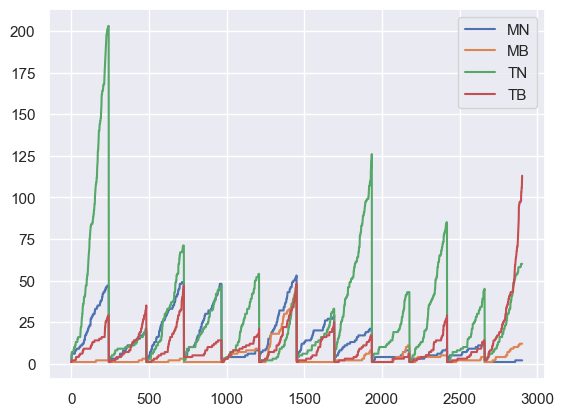

In [34]:
fig, ax = plt.subplots()

ax.plot(MNe, label = "MN")
ax.plot(MBe, label = "MB")
ax.plot(TNe, label = "TN")
ax.plot(TBe, label = "TB")


ax.legend()



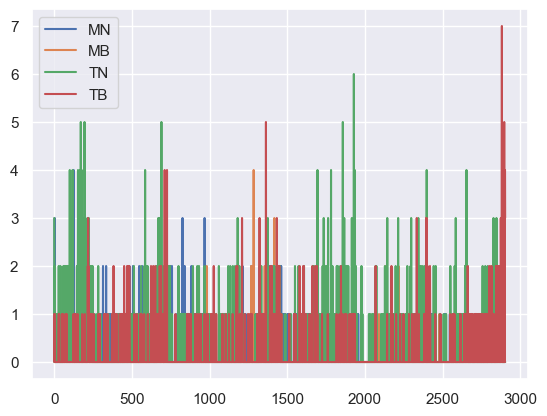

In [35]:
fig, ax = plt.subplots()

ax.plot(MNe_norm, label = "MN")
ax.plot(MBe_norm, label = "MB")
ax.plot(TNe_norm, label = "TN")
ax.plot(TBe_norm, label = "TB")

ax.legend()


This looks like a Christmas decoration lol

In [36]:
# Statistical significance things
print("P-value for the ANOVA test between mouse normal, mouse bubble: {0}".format(stats.f_oneway(MNe_norm, MBe_norm).pvalue))
print("P-value for the ANOVA test between mouse bubble, tablet bubble: {0}".format(stats.f_oneway(MBe_norm, TBe_norm).pvalue))
print("P-value for the ANOVA test between mouse normal, tablet normal: {0}".format(stats.f_oneway(MNe_norm, TNe_norm).pvalue))
print("P-value for the ANOVA test between tablet normal, tablet bubble: {0}".format(stats.f_oneway(TNe_norm, TBe_norm).pvalue))



P-value for the ANOVA test between mouse normal, mouse bubble: 5.1786548572169845e-20
P-value for the ANOVA test between mouse bubble, tablet bubble: 1.4208512442352516e-26
P-value for the ANOVA test between mouse normal, tablet normal: 2.228228437164663e-39
P-value for the ANOVA test between tablet normal, tablet bubble: 7.988135348378007e-24


All of them seem statistically different. 

### 5.4 Let us look at the total number of errors only 

In [37]:
def get_total_errors(file_names, column_name):

    result = [] 

    for f in file_names:
        result.append(max(pd.read_csv(os.path.join("data", f), skiprows=2)[column_name]))

    return np.array(result)


In [38]:
MNe_all = get_total_errors(file_names_MN, "currentNumberOfErrors") 
MBe_all = get_total_errors(file_names_MB, "currentNumberOfErrors")
TNe_all = get_total_errors(file_names_TN, "currentNumberOfErrors")
TBe_all = get_total_errors(file_names_TB, "currentNumberOfErrors")


In [39]:
TBe_all

array([ 29,  35,  47,  14,  21,  48,  25,  17,   6,  29,  14, 113])

In [40]:
# Statistical significance things
print("P-value for the ANOVA test of final values between mouse normal, mouse bubble: {0}".format(stats.f_oneway(MNe_all, MBe_all).pvalue))
print("P-value for the ANOVA test of final values between mouse bubble, tablet bubble: {0}".format(stats.f_oneway(MBe_all, TBe_all).pvalue))
print("P-value for the ANOVA test of final values between mouse normal, tablet normal: {0}".format(stats.f_oneway(MNe_all, TNe_all).pvalue))
# TODO: why is that equal to 0 -- Mattis 
print("P-value for the ANOVA test of final values between tablet normal, tablet bubble: {0}".format(stats.f_oneway(TNe_all, TBe_all).pvalue))



P-value for the ANOVA test of final values between mouse normal, mouse bubble: 0.016367490997535837
P-value for the ANOVA test of final values between mouse bubble, tablet bubble: 0.011319536124970709
P-value for the ANOVA test of final values between mouse normal, tablet normal: 0.009257414636715552
P-value for the ANOVA test of final values between tablet normal, tablet bubble: 0.03907096942638157


From the p-value, they look like statistically different distributions. 